In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [92]:
raw_df=pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

In [93]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [94]:
raw_df.dropna(subset=['RainTomorrow'],inplace=True)

In [95]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

In [96]:
import plotly.express as px 

In [97]:
px.scatter(raw_df,
           x='WindGustSpeed',
           y='MinTemp',
           color='RainToday')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<Axes: xlabel='Date', ylabel='count'>

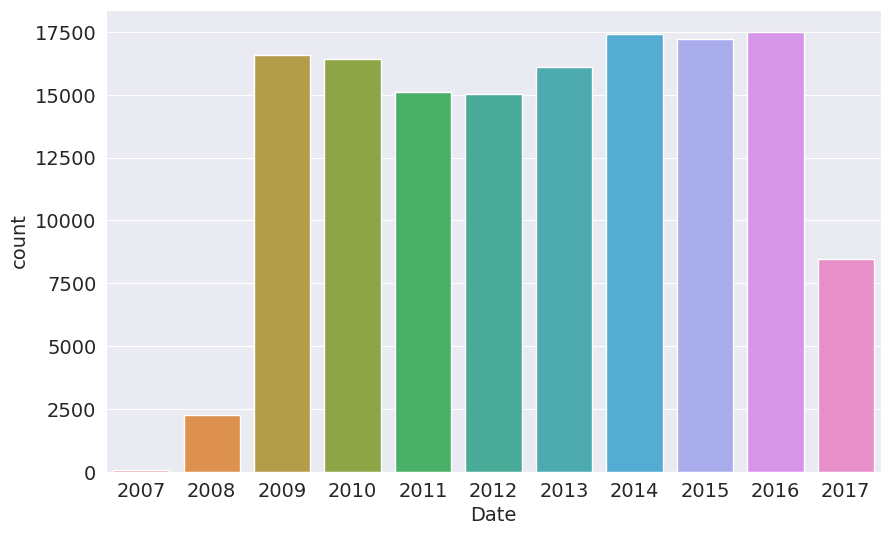

In [98]:
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

Create a train test split

In [99]:
year=pd.to_datetime(raw_df.Date).dt.year

In [100]:
year.head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Date, dtype: int32

In [101]:
train_df=raw_df[year<2015]
val_df=raw_df[year==2015]
test_df=raw_df[year>2015]

Input and target columns

In [102]:
list(train_df.columns)

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [103]:
input_cols=list(train_df.columns[1:22])
target_col='RainTomorrow'

In [104]:
train_inputs=train_df[input_cols].copy()
train_target=train_df[target_col].copy()

In [105]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [106]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

identify numeric and categorical columns

In [107]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes('object').columns.tolist()

In [108]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [109]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


imputing missing numeric values

In [110]:
from sklearn.impute import SimpleImputer

In [111]:
imputer=SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])

In [112]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])


In [113]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

Scaling Numeric Features

In [114]:
raw_df[numeric_cols].describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm  
count  88536.000000  85099.000000  141289.000000  139467.000000  
mean       4.437189      4.503167      16.987509      21.687235  
std        2.887016      2.720633       6.492838       6.937594  
min        0.000000      0.000000      -7.200000      -5.400000  
25%        1.000000      2.000000      12.300000      16.600000  
50%        5.000000      5.000000      16.700000      21.100000  
75%        7.000000      7.000000      21.600000      26.400000  
max        9.000000      9.000000      40.200000      46.700000

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
scaler=MinMaxScaler().fit(raw_df[numeric_cols])

In [117]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [118]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  98988.000000  98988.000000  98988.000000  98988.000000  98988.000000   
mean       0.483557      0.525583      0.006395      0.036934      0.524929   
std        0.149330      0.132006      0.022845      0.021552      0.200488   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037723      0.525852   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   98988.000000  98988.000000  98988.000000  98988.000000  98988.000000   
mean        0.265223      0.108470      0.215734      0.686543      0.515015   
std         0.102531      0.068789      0.101451      0.188738      0.206181   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  98988.000000  98988.000000  98988.000000  98988.000000  98988.000000   
mean       0.612080      0.608796      0.483856      0.494156      0.506933   
std        0.111257      0.106567      0.254707      0.237394      0.134483   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614112      0.610531      0.493021      0.500352      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  98988.000000  
mean       0.516827  
std        0.130703  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

Encoding categorical data

In [119]:
from sklearn.preprocessing import OneHotEncoder

In [120]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(raw_df[categorical_cols])

In [121]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols)).copy()
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [122]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols]).copy()
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols]).copy()
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols]).copy()


/tmp/ipykernel_34/1120064250.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_34/1120064250.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_34/1120064250.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_34/1120064250.py:1: PerformanceWarning:

Da

In [123]:
train_inputs.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury  0.516509  0.523629  0.001617     0.037723  0.525852           W   
1   Albury  0.375000  0.565217  0.000000     0.037723  0.525852         WNW   
2   Albury  0.504717  0.576560  0.000000     0.037723  0.525852         WSW   
3   Albury  0.417453  0.620038  0.000000     0.037723  0.525852          NE   
4   Albury  0.613208  0.701323  0.002695     0.037723  0.525852           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0       0.294574          W        WNW      0.153846      0.275862   
1       0.294574        NNW        WSW      0.030769      0.252874   
2       0.310078          W        WSW      0.146154      0.298851   
3       0.139535         SE          E      0.084615      0.103448   
4       0.271318        ENE         NW      0.053846      0.229885   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         0.71         0.22     0.449587       0.4800  0.888889  0.500352   
1         0.44         0.25     0.497521       0.4912  0.493021  0.500352   
2         0.38         0.30     0.447934       0.5056  0.493021  0.222222   
3         0.45         0.16     0.613223       0.5712  0.493021  0.500352   
4         0.82         0.33     0.500826       0.4624  0.777778  0.888889   

    Temp9am   Temp3pm RainToday  Location_Adelaide  Location_Albany  \
0  0.508439  0.522073        No                0.0              0.0   
1  0.514768  0.570058        No                0.0              0.0   
2  0.594937  0.548944        No                0.0              0.0   
3  0.533755  0.612284        No                0.0              0.0   
4  0.527426  0.673704        No                0.0              0.0   

   Location_Albury  Location_AliceSprings  Location_BadgerysCreek  \
0              1.0                    0.0                     0.0   
1              1.0                    0.0                     0.0   
2              1.0                    0.0                     0.0   
3              1.0                    0.0                     0.0   
4              1.0                    0.0                     0.0   

   Location_Ballarat  Location_Bendigo  Location_Brisbane  Location_Cairns  \
0                0.0               0.0                0.0              0.0   
1                0.0               0.0                0.0              0.0   
2                0.0               0.0                0.0              0.0   
3                0.0               0.0                0.0              0.0   
4                0.0               0.0                0.0              0.0   

   Location_Canberra  Location_Cobar  Location_CoffsHarbour  \
0                0.0             0.0                    0.0   
1                0.0             0.0                    0.0   
2                0.0             0.0                    0.0   
3                0.0             0.0                    0.0   
4                0.0             0.0                    0.0   

   Location_Dartmoor  Location_Darwin  Location_GoldCoast  Location_Hobart  \
0                0.0              0.0                 0.0              0.0   
1                0.0              0.0                 0.0              0.0   
2                0.0              0.0                 0.0              0.0   
3                0.0              0.0                 0.0              0.0   
4                0.0              0.0                 0.0              0.0   

   Location_Katherine  Location_Launceston  Location_Melbourne  \
0                 0.0                  0.0                 0.0   
1                 0.0                  0.0                 0.0   
2                 0.0                  0.0                 0.0   
3                 0.0                  0.0                 0.0   
4                 0.0                  0.0                 0.0   

   Location_MelbourneAirport  Location_Mildura  Location_Moree  \
0                    

In [124]:
X_train=train_inputs[numeric_cols+encoded_cols]
X_val=val_inputs[numeric_cols+encoded_cols]
X_test=test_inputs[numeric_cols+encoded_cols]

In [125]:
X_test

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
2498    0.681604  0.801512  0.000000     0.037723  0.525852       0.372093   
2499    0.693396  0.725898  0.001078     0.037723  0.525852       0.341085   
2500    0.634434  0.527410  0.005930     0.037723  0.525852       0.325581   
2501    0.608491  0.538752  0.042049     0.037723  0.525852       0.255814   
2502    0.566038  0.523629  0.018329     0.037723  0.525852       0.193798   
...          ...       ...       ...          ...       ...            ...   
145454  0.283019  0.502836  0.000000     0.037723  0.525852       0.193798   
145455  0.266509  0.533081  0.000000     0.037723  0.525852       0.193798   
145456  0.285377  0.568998  0.000000     0.037723  0.525852       0.124031   
145457  0.327830  0.599244  0.000000     0.037723  0.525852       0.240310   
145458  0.384434  0.601134  0.000000     0.037723  0.525852       0.170543   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
2498        0.000000      0.080460         0.46         0.17     0.543802   
2499        0.069231      0.195402         0.54         0.30     0.505785   
2500        0.084615      0.448276         0.62         0.67     0.553719   
2501        0.069231      0.195402         0.74         0.65     0.618182   
2502        0.046154      0.103448         0.92         0.63     0.591736   
...              ...           ...          ...          ...          ...   
145454      0.115385      0.149425         0.59         0.27     0.730579   
145455      0.100000      0.126437         0.51         0.24     0.728926   
145456      0.100000      0.103448         0.56         0.21     0.710744   
145457      0.069231      0.103448         0.53         0.24     0.669421   
145458      0.100000      0.080460         0.51         0.24     0.642975   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
2498         0.5136  0.777778  0.333333  0.702532  0.808061   
2499         0.5008  0.888889  0.888889  0.675105  0.712092   
2500         0.6032  0.888889  0.888889  0.611814  0.477927   
2501         0.6304  0.888889  0.888889  0.556962  0.518234   
2502         0.5888  0.888889  0.888889  0.514768  0.529750   
...             ...       ...       ...       ...       ...   
145454       0.7056  0.493021  0.500352  0.350211  0.504798   
145455       0.6912  0.493021  0.500352  0.364979  0.533589   
145456       0.6720  0.493021  0.500352  0.381857  0.573896   
145457       0.6352  0.493021  0.500352  0.415612  0.604607   
145458       0.6304  0.333333  0.222222  0.470464  0.602687   

        Location_Adelaide  Location_Albany  Location_Albury  \
2498                  0.0              0.0              1.0   
2499                  0.0              0.0              1.0   
2500                  0.0              0.0              1.0   
2501                  0.0              0.0              1.0   
2502                  0.0              0.0              1.0   
...                   ...              ...              ...   
145454                0.0              0.0              0.0   
145455                0.0              0.0              0.0   
145456                0.0              0.0              0.0   
145457                0.0              0.0              0.0   
145458                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
2498                      0.0                     0.0                0.0   
2499                      0.0                     0.0                0.0   
2500                      0.0                     0.0                0.0   
2501                      0.0                     0.0                0.0   
2502                      0.0                     0.0                0.0   
...                       ...                     ...                ...   
145454                    0.0                     0.0                0.0   
145455                   

train your model

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
model=DecisionTreeClassifier(random_state=42)

In [128]:
%%time
model.fit(X_train,train_target)

CPU times: user 4.1 s, sys: 24.7 ms, total: 4.13 s
Wall time: 4.14 s


DecisionTreeClassifier(random_state=42)

Evaluation

In [129]:
train_preds=model.predict(X_train)

In [130]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [131]:
pd.value_counts(train_preds)

/tmp/ipykernel_34/1258350197.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



No     76707
Yes    22281
Name: count, dtype: int64

In [132]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [133]:
accuracy_score(train_preds,train_target)

0.9999797955307714

In [134]:
model.score(X_train,train_target)

0.9999797955307714

We can make predictions and compute accuracy in one step using `model.score`



In [135]:
model.score(X_val,val_targets)

0.7921188555510418

It appears that the model has learned the training examples perfect and doesnt generalize well to previously unseen examples.This phenomenon is called overfiiting and  we have to reduce it

**We can visualize the decsion tree learned from the training data**

In [136]:
from sklearn.tree import plot_tree,export_text

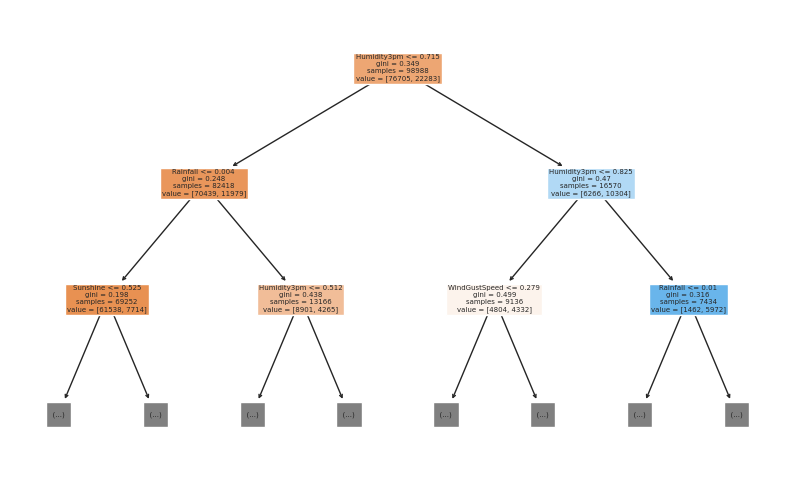

In [137]:
 plot_tree(model,feature_names=X_train.columns,max_depth=2,filled=True);

In [138]:
model.tree_.max_depth

48

In [139]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

***Feature Importance***
Based on the gini index computations,a decision tree assigns an importance value to each feature .
These values can be used to interpret the results given by a decsion tree

In [140]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan', 'RainToday_No',
       'RainToday_Yes', 'RainToday_nan'],
      dtype='object', length=119)

In [141]:
model.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

In [142]:
importance_df=pd.DataFrame({'feature':X_train.columns,
                           'importance':model.feature_importances_}).sort_values('importance',ascending=False)

In [143]:
importance_df.head(10)

feature  importance
9     Humidity3pm    0.261441
11    Pressure3pm    0.062057
2        Rainfall    0.059139
5   WindGustSpeed    0.056333
4        Sunshine    0.049465
8     Humidity9am    0.040218
14        Temp9am    0.035000
0         MinTemp    0.034894
10    Pressure9am    0.034415
1         MaxTemp    0.032361

<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

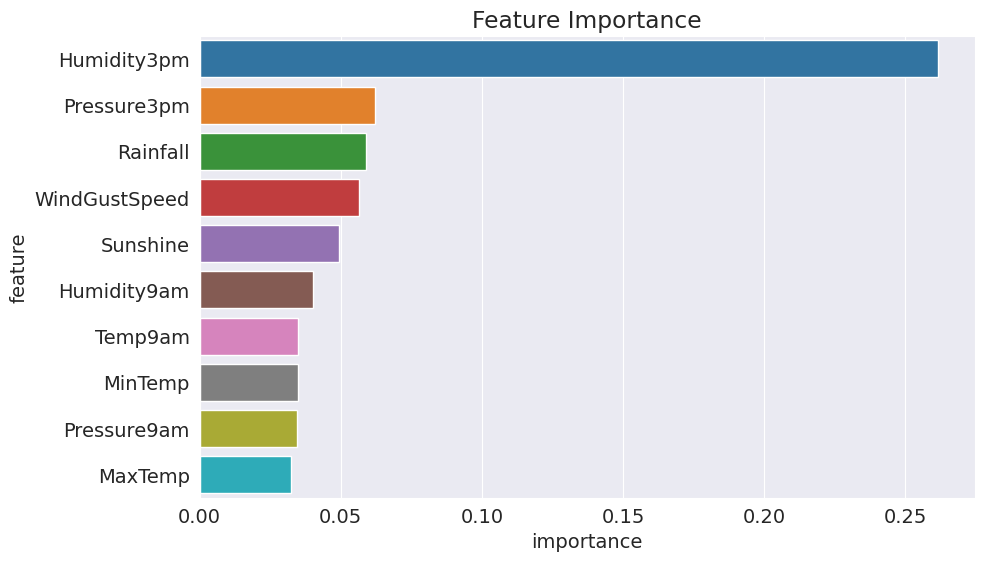

In [144]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),
           x='importance',
           y='feature')

`Hyperparameter Tuning and Overfitting`
As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting.

The DecisionTreeClassifier accepts several arguments, some of which can be modified to reduce overfitting.

**These arguments are called hyperparameters because they must be configured manually .
We will explore couple of hyperparameters
`max_depth`  `max_leaf_nodes`**

***`max_depth`---> By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization ***

In [145]:
model=DecisionTreeClassifier(max_depth=3,random_state=42)

In [146]:
model.fit(X_train,train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [147]:
model.score(X_train,train_target)

0.8291308037337859

In [148]:
model.score(X_val,val_targets)

0.8334397307178921

great now the the validation accuracy of the model has increased

In [149]:
model.classes_

array(['No', 'Yes'], dtype=object)

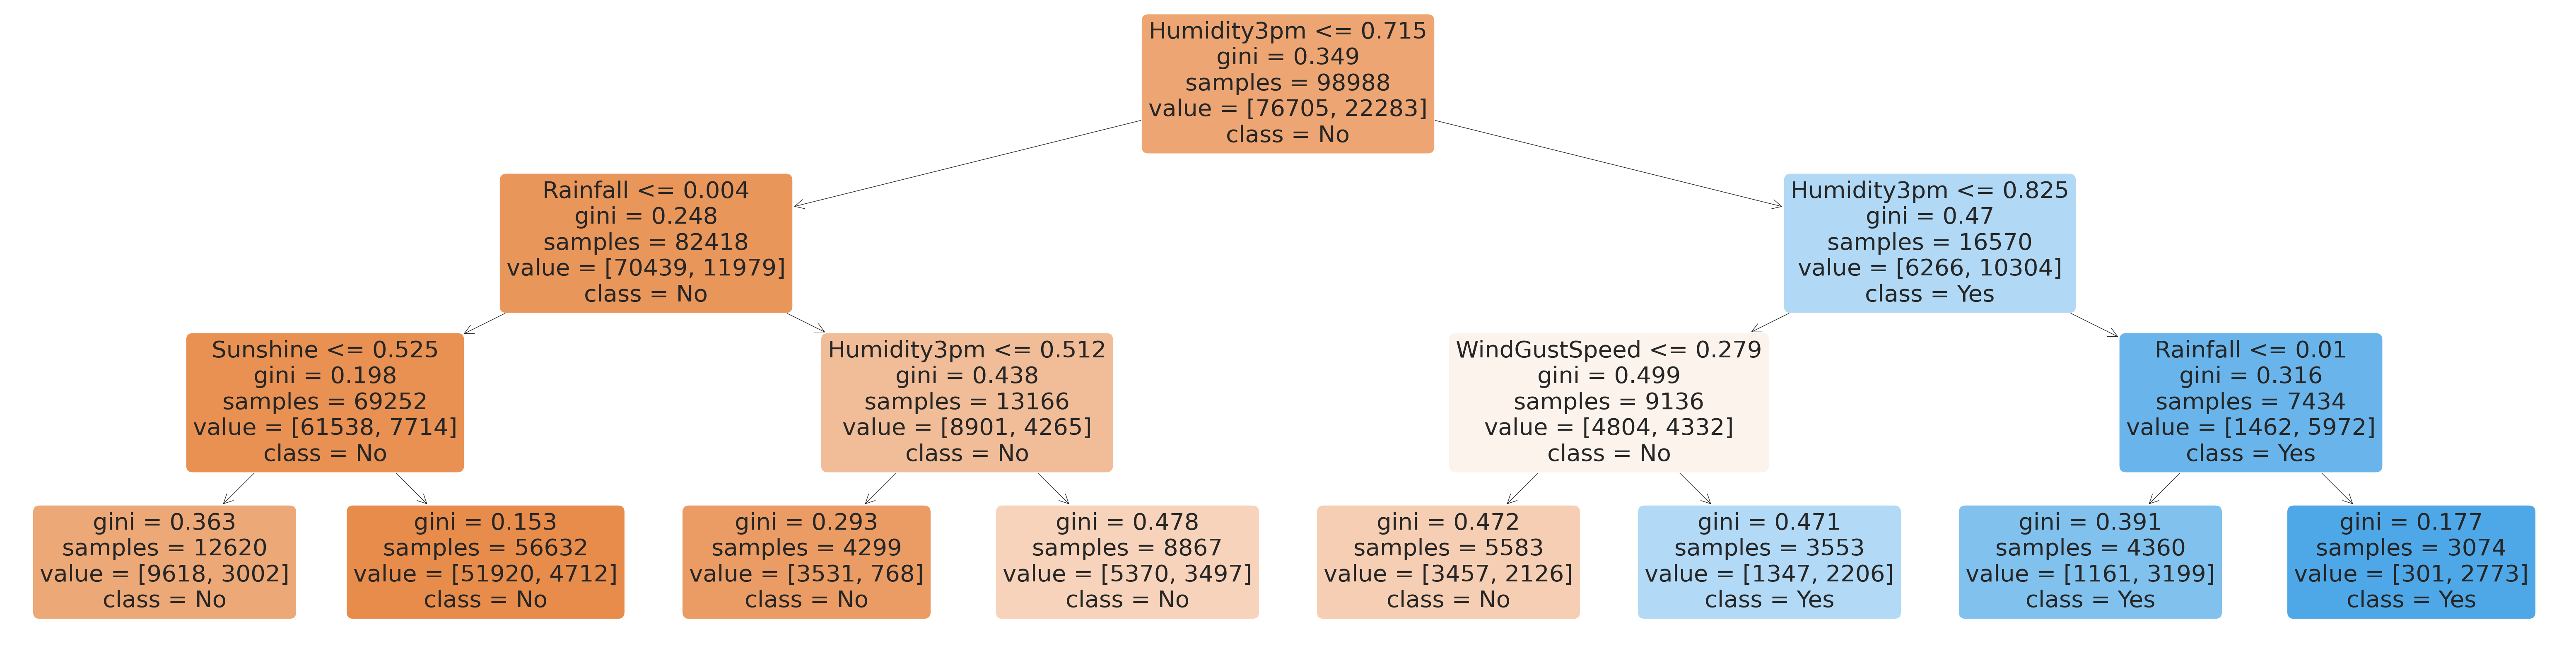

In [150]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [151]:
print(export_text(model,feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



In [152]:
def max_depth_error(md):
    model=DecisionTreeClassifier(max_depth=md,random_state=42)
    model.fit(X_train,train_target)
    train_error=1-model.score(X_train,train_target)
    val_error=1-model.score(X_val,val_targets)
    return {'Max Depth':md,'Training Error':train_error,'Validation Error':val_error}

In [153]:
errors_df=pd.DataFrame([max_depth_error(md) for md in range(1,21)])

In [154]:
errors_df

Max Depth  Training Error  Validation Error
0           1        0.184315          0.177935
1           2        0.179547          0.172712
2           3        0.170869          0.166560
3           4        0.165707          0.164355
4           5        0.160676          0.159074
5           6        0.156271          0.157275
6           7        0.153312          0.154605
7           8        0.147806          0.158029
8           9        0.140906          0.156578
9          10        0.132945          0.157333
10         11        0.123227          0.159248
11         12        0.113489          0.160815
12         13        0.101750          0.163833
13         14        0.089981          0.167373
14         15        0.078999          0.171261
15         16        0.068180          0.174279
16         17        0.058138          0.176890
17         18        0.048733          0.181243
18         19        0.040025          0.187569
19         20        0.032539          0.190297

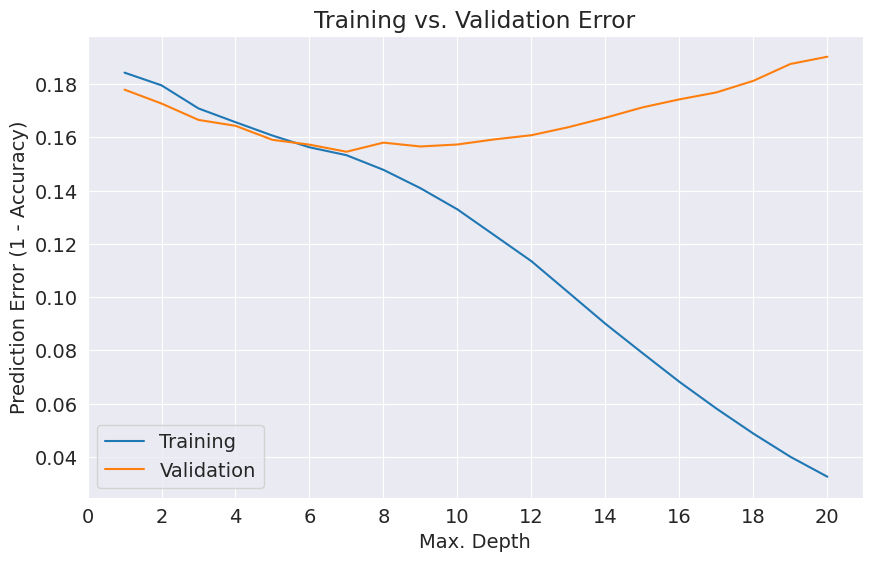

In [155]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

*You will often need to tune hyperparameters carefully to find the optimal fit.
It appears that a maximum depth in above case is 7 that results in lowest validation error*

In [156]:
model=DecisionTreeClassifier(max_depth=7,random_state=42).fit(X_train,train_target)
model.score(X_val,val_targets)

0.8453949277465034

`max_leaf_nodes`
* Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes.This allows branches of the tree to have varying depths.

In [157]:
model=DecisionTreeClassifier(max_leaf_nodes=128,random_state=42)

In [158]:
model.fit(X_train,train_target)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [159]:
model.score(X_train,train_target)

0.8480421869317493

In [160]:
model.score(X_val,val_targets)

0.8442342290058615

In [161]:
model.tree_.max_depth

12

**`Training a Random Forest`**

In [162]:
 from sklearn.ensemble import RandomForestClassifier

In [163]:
model=RandomForestClassifier(n_jobs=-1,random_state=42)

In [164]:
model.fit(X_train,train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [165]:
model.score(X_train,train_target)

0.9999494888269285

In [166]:
model.score(X_val,val_targets)

0.8566537055307295

Once again,the training accuracy is almost 100% ,but but this time the validation accuracy is much better infact it is better than fine tuned decesion tree

**This general technique of combining the results of many models is called `ensembling`. It works because most errors of individual models cancel out on averaging**
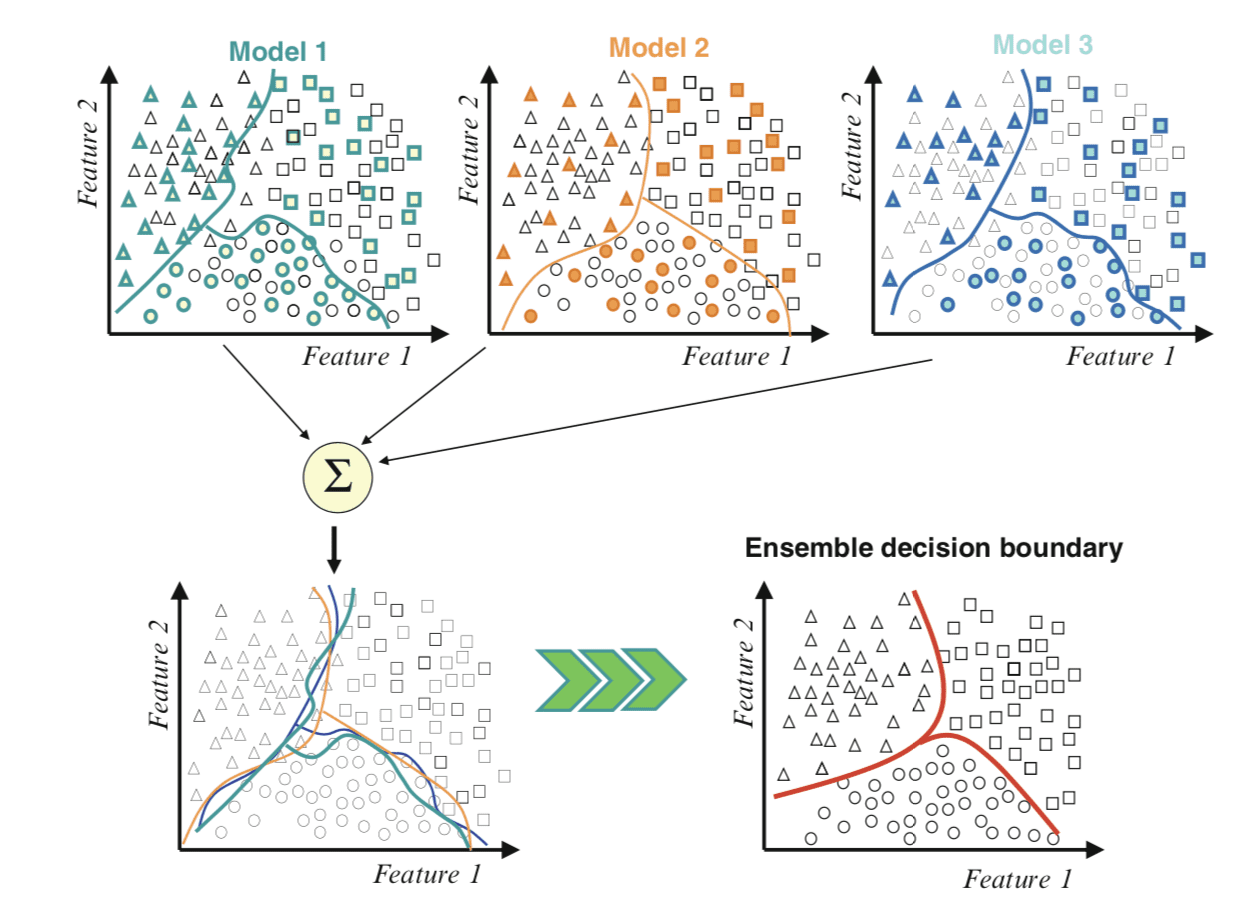

we can also look at the probabilities for the prediction

In [167]:
train_probs=model.predict_proba(X_train)
train_probs

array([[0.93, 0.07],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04]])

***We can access those individual decision trees using `model.estimators_`***

In [168]:
len(model.estimators_)

100

therefore by default 100 decision trees

In [169]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

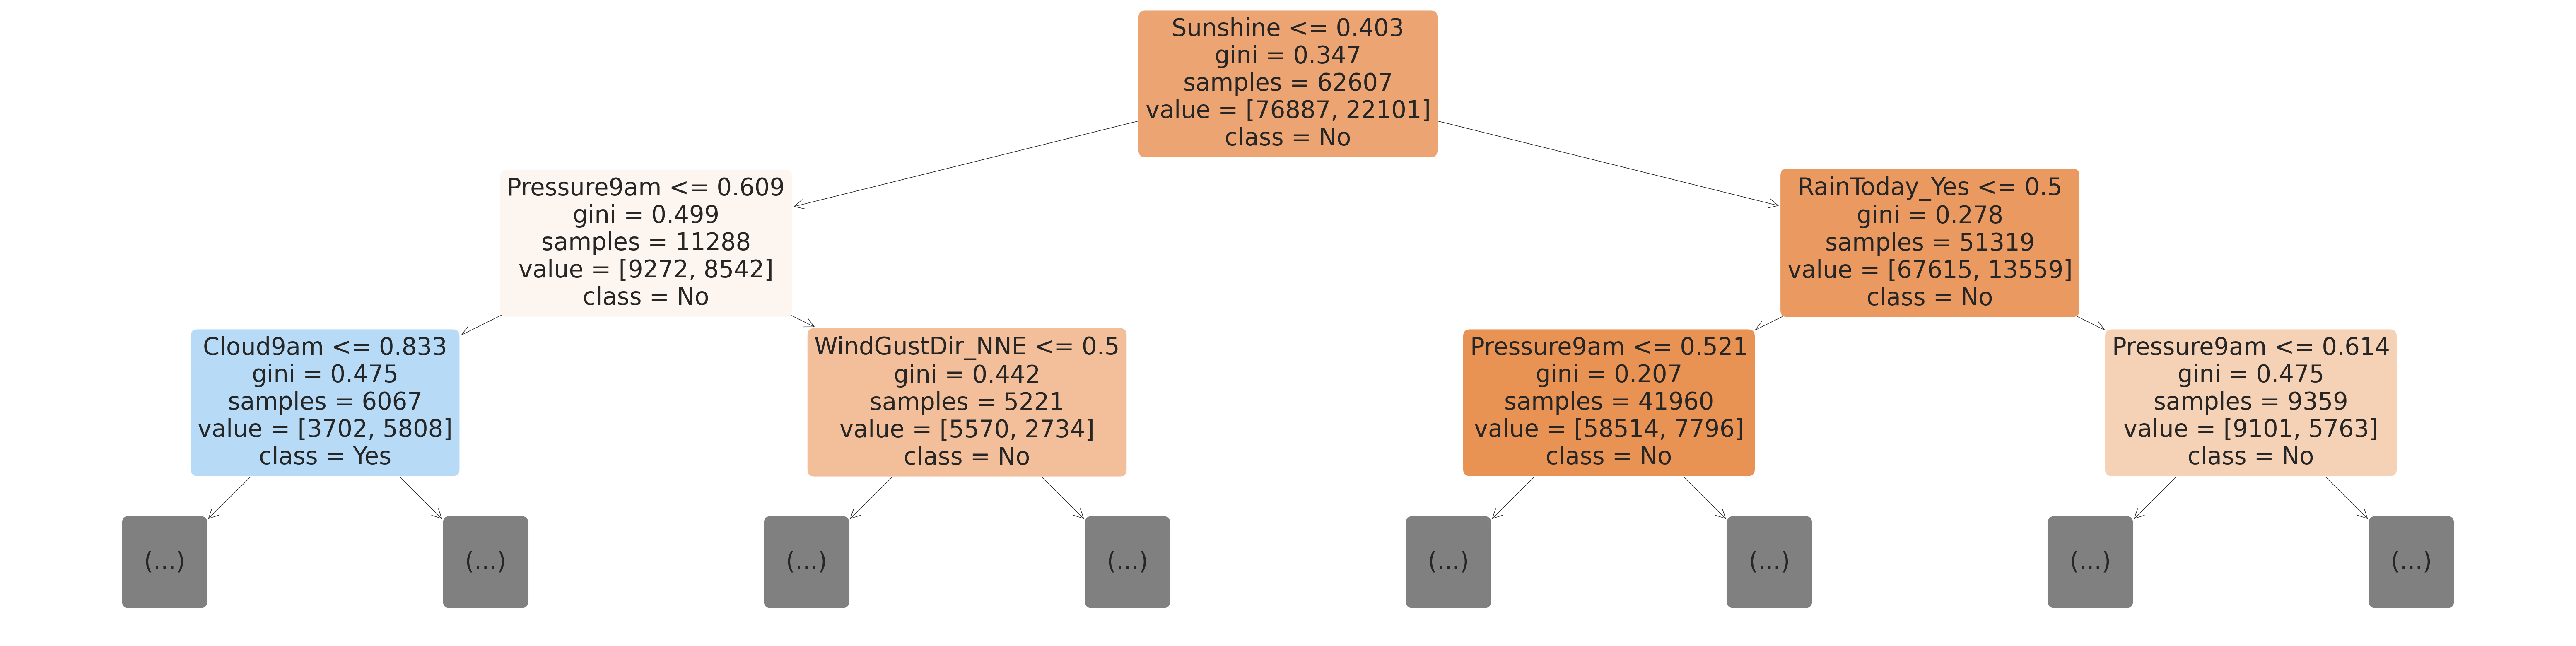

In [170]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

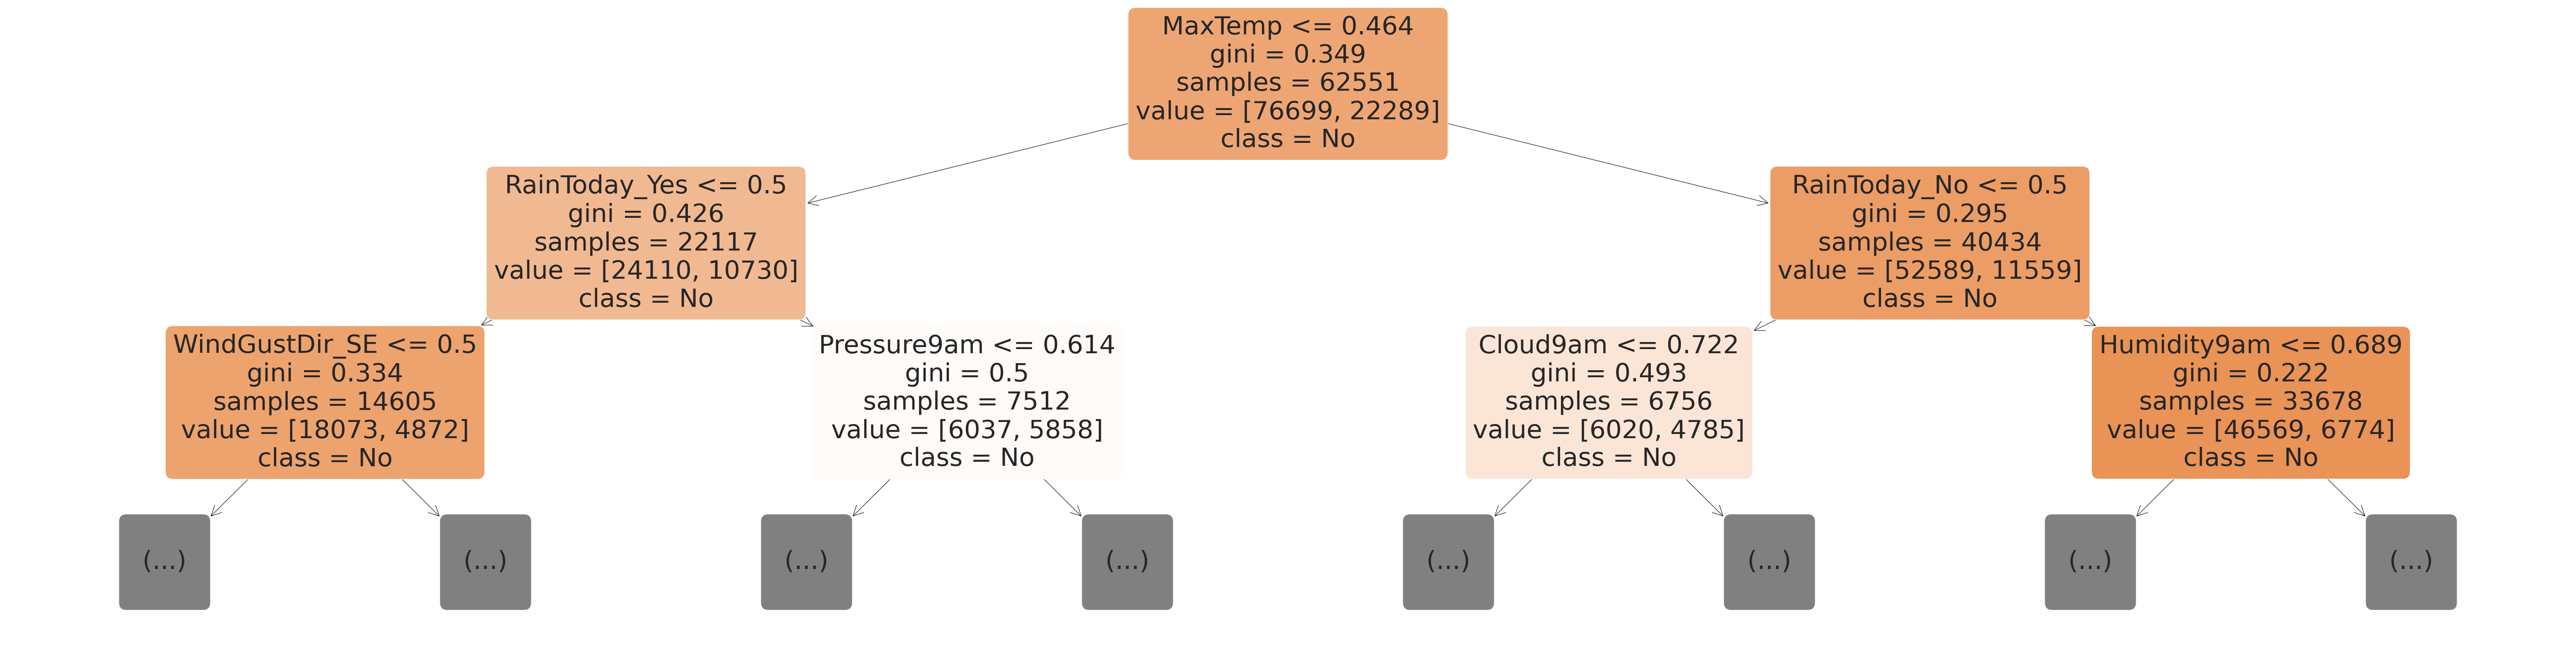

In [171]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[99], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

Just like decision tree,random forests also assign an `importance` to each feature , by combining the importance values from individual trees.

In [172]:
importance_df=pd.DataFrame({
    'feature':X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

In [173]:
importance_df.head()

feature  importance
9   Humidity3pm    0.139904
4      Sunshine    0.053696
11  Pressure3pm    0.052713
8   Humidity9am    0.050051
2      Rainfall    0.048077

<Axes: xlabel='importance', ylabel='feature'>

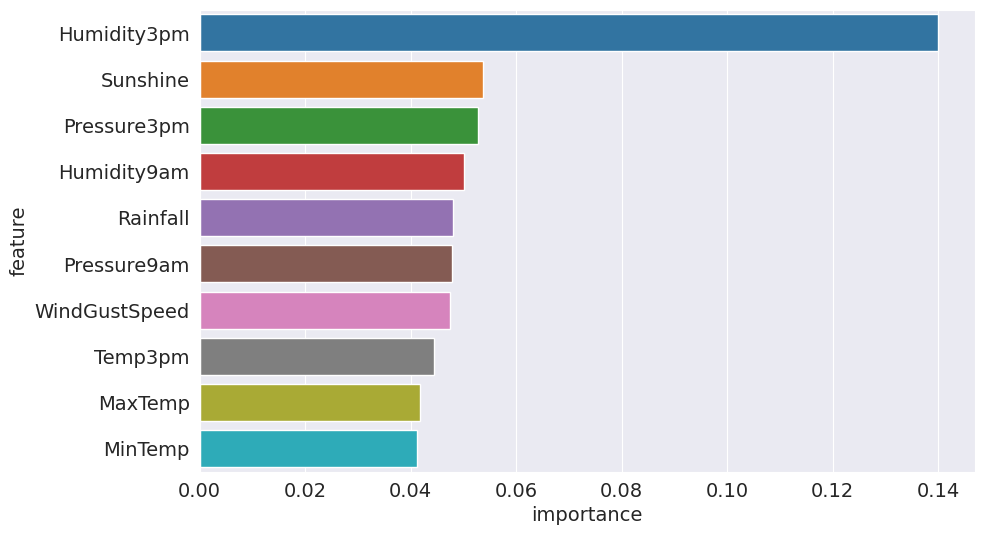

In [174]:
sns.barplot(data=importance_df.head(10),y='feature',x='importance')

**`Hyperparameter Tuning with Random Forests`**

So lets create a base model with which we can compare models with tuned hyperparameters

In [176]:
base_model=RandomForestClassifier(random_state=42,n_jobs=-1).fit(X_train,train_target)

In [184]:
base_train_acc=base_model.score(X_train,train_target)
base_val_acc=base_model.score(X_val,val_targets)
base_accs=base_train_acc,base_val_acc
base_accs

(0.9999494888269285, 0.8566537055307295)

**`n_estimators`**
This argument controls the number of decision trees in the random forest.The default value is 100.For larger datasets ,it helps to have a greater number of estimators.

**10 estimators**

In [181]:
model=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=10)

In [182]:
model.fit(X_train,train_target)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [183]:
model.score(X_train,train_target),model.score(X_val,val_targets)

(0.986958015112943, 0.8485868492832686)

now compare with base

In [185]:
base_accs

(0.9999494888269285, 0.8566537055307295)

**300 estimators**

In [186]:
model=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=300)
model.fit(X_train,train_target)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [187]:
model.score(X_train,train_target),model.score(X_val,val_targets)

(0.9999797955307714, 0.8573501247751146)

In [188]:
base_accs

(0.9999494888269285, 0.8566537055307295)

**`max_depth  and  max-leaf_nodes`**
These arguments are passed directly to each decision tree, and control the maximum depth and max. no leaf nodes of each decision tree respectively.By default no maximum depth is specified ,which is why each tree has a training accuracy of 100% .
You can specify a max_depth to reduce overfitting

**Lets define a helper function `test_params` to make it easy to test hyperparameters**

In [189]:
def test_params(**params):
    model=RandomForestClassifier(random_state=42,n_jobs=-1,**params).fit(X_train,train_target)
    return model.score(X_train,train_target),model.score(X_val,val_targets)

lets test a few values of max_depth and max_leaf_nodes.

In [190]:
test_params(max_depth=5)

(0.8197862367155615, 0.8240961058557251)

In [191]:
test_params(max_depth=26)

(0.9814826039519942, 0.8572340549010504)

In [192]:
test_params(max_leaf_nodes=2**5)

(0.8314341132258456, 0.833904010214149)

In [193]:
test_params(max_leaf_nodes=2**20)

(0.9999595910615429, 0.8568278103418258)

In [194]:
base_accs

(0.9999494888269285, 0.8566537055307295)

`max_features`

In [195]:
 X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan', 'RainToday_No',
       'RainToday_Yes', 'RainToday_nan'],
      dtype='object', length=119)

### `max_features`

Instead of picking all features (columns) for every split, we can specify that only a fraction of features be chosen randomly to figure out a split.

<img src="https://i.imgur.com/FXGWMDY.png" width="720">

Notice that the default value `auto` causes only $\sqrt{n}$ out of total features ( $n$ ) to be chosen randomly at each split. This is the reason each decision tree in the forest is different. While it may seem counterintuitive, choosing all features for every split of every tree will lead to identical trees, so the random forest will not generalize well. 

In [196]:
test_params(max_features='log2')

(0.9999595910615429, 0.8558992513493123)

In [197]:
test_params(max_features=3)

(0.9999494888269285, 0.8543323080494458)

In [200]:
test_params(max_features=20)

(0.9999595910615429, 0.8565956705936975)

In [199]:
base_accs

(0.9999494888269285, 0.8566537055307295)

`**min_samples_split  and  min_samples_leaf**`
By default ,the decision tree classifier tries to split every node that has 2 or more .You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets

In [206]:
test_params(min_samples_split=5,min_samples_leaf=2)

(0.9573584676930537, 0.855144797167895)

In [207]:
test_params(min_samples_split=100,min_samples_leaf=60)

(0.8495676243585081, 0.8451047530613429)

In [209]:
base_accs

(0.9999494888269285, 0.8566537055307295)

### `min_impurity_decrease`

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.


In [215]:
test_params(min_impurity_decrease=1e-6)

(0.9888168262819735, 0.8561313910974406)

In [213]:
test_params(min_impurity_decrease=1e-2)

(0.774891906089627, 0.7882885497069235)

In [214]:
base_accs

(0.9999494888269285, 0.8566537055307295)

**`Bootstrap , max-samples`**

In [216]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8567697754047937)

In [217]:
test_params(max_samples=0.9)

(0.9997676486038711, 0.8565376356566653)

In [218]:
base_accs

(0.9999494888269285, 0.8566537055307295)

`class_weight`

In [221]:
train_target.value_counts()/len(train_target)*100

RainTomorrow
No     77.489191
Yes    22.510809
Name: count, dtype: float64

In [222]:
test_params(class_weight='balanced')

(0.9999595910615429, 0.8553769369160235)

In [223]:
test_params(class_weight={'No':1,'Yes':2})

(0.9999595910615429, 0.8558412164122802)

In [224]:
base_accs

(0.9999494888269285, 0.8566537055307295)

### Putting it together
Lets train a random forest with customized hyperparameters based on above

In [229]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=20,
                               max_depth=30, 
                               class_weight={'No': 1, 'Yes': 1.5})

In [230]:
model.fit(X_train,train_target)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=20, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [231]:
model.score(X_train, train_target), model.score(X_val, val_targets)

(0.9991716167616277, 0.8565956705936975)

In [232]:
base_accs

(0.9999494888269285, 0.8566537055307295)